## IMPORT

In [ ]:
# !python3 -m pip install torchio
# !python3 -m pip install zstd

In [ ]:
# IMPORT: utils
import os
import shutil

# IMPORT: dataset processing
import torchio as tio

import skimage
from PIL import Image

import numpy as np
import torch
import zstd
import cv2

# IMPORT: data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
DATA_TEST_PATH = os.path.join("data")

## FUNCTIONS

### DOWNLOAD

In [ ]:
def download_data(path):
    download = not os.path.exists(path)
    return tio.datasets.ixi.IXITiny(root=path, download=download)

### LOAD

In [ ]:
def load_image(path):
    array = skimage.io.imread(path).copy().astype(np.int32)
    return torch.from_numpy(array).type(torch.int32)

In [ ]:
def load_image(path):
    array = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return torch.from_numpy(array).type(torch.int32)

In [ ]:
def load_numpy(path):
    array = np.load(path).copy()
    return torch.from_numpy(array).type(torch.int32)

In [ ]:
def load_zstd(path):
    array = np.load(path, allow_pickle=True)
    header = array["header"][()]

    array = zstd.decompress(array["data"])
    array = np.frombuffer(array, dtype=header["dtype"]).copy()
    array = np.reshape(array, header["shape"])

    return torch.from_numpy(array).type(torch.int32)

In [ ]:
def load_tensor(path):
    return torch.load(path).type(torch.int32)

### PROCESS

In [ ]:
def crop_data(tensor: torch.Tensor, crop_type):
    d_c = tensor.shape[1]//2

    if crop_type == "2D":
        return tensor[0, d_c, :32, :32]

    elif crop_type == "2D_modalities":
        tensor = tensor[0, d_c:d_c+3, :32, :32]
        return torch.permute(tensor, (1, 2, 0))

    elif crop_type == "3D":
        return tensor[0, d_c-10:d_c+10, :32, :32]

### SAVE

In [ ]:
def save_as_png(tensor, path):
    cv2.imwrite(path, tensor.numpy())

In [ ]:
def save_as_npy(tensor, path):
    np.save(path, tensor.numpy())

In [ ]:
def save_as_npz(tensor, path):
    header = {"shape": tensor.shape, "dtype": np.int32}
    array = zstd.compress(tensor.numpy().copy(), -10, 0)

    np.savez(path, data=array, header=header)

In [ ]:
def save_as_pt(tensor, path):
    torch.save(tensor, path)

### VISUALIZATION

In [ ]:
def plot_3D(tensor):
    fig = plt.figure(figsize=(15, 8))

    gs = GridSpec(1, 3)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[0, 2])

    ax0.imshow(torch.max(tensor, dim=0).values, cmap="gray")
    ax1.imshow(torch.max(tensor, dim=1).values, cmap="gray")
    ax2.imshow(torch.max(tensor, dim=2).values, cmap="gray")

    plt.tight_layout()
    plt.show()

## MAIN

In [ ]:
if not os.path.exists(DATA_TEST_PATH):
    os.makedirs(DATA_TEST_PATH)
data = download_data(path=os.path.join(DATA_TEST_PATH, "dataset_tmp"))

# INPUT
input = data[1]["image"].data

values = torch.unique(input)
input = ((input / max(values)) * 255).type(torch.int32)

# TARGET
target = data[1]["label"].data.type(torch.int32)

Root directory for IXITiny not found: data/dataset_tmp
Downloading...


0it [00:00, ?it/s]

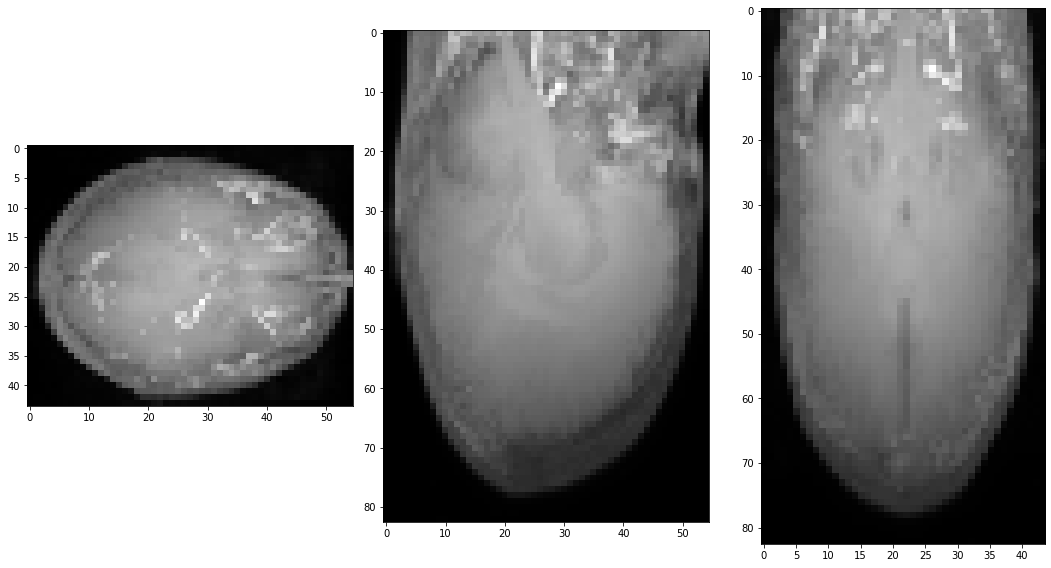

In [ ]:
plot_3D(input[0])

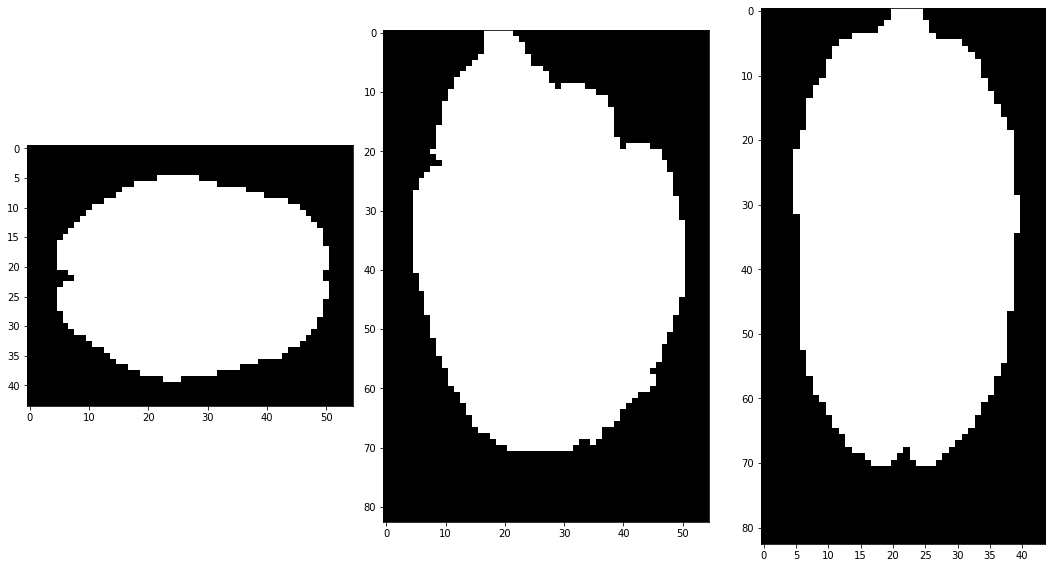

In [ ]:
plot_3D(target[0])

### 2D

torch.int32


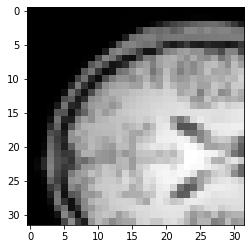

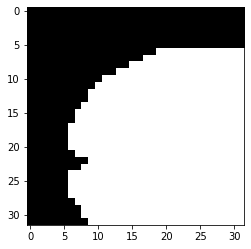

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D", "png")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D", "png"))

# INPUT
path = os.path.join(DATA_TEST_PATH, "2D", "png", "input.png")

tensor = crop_data(input, crop_type="2D")
save_as_png(tensor, path=path)

plt.imshow(load_image(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D", "png", "target.png")

tensor = crop_data(target, crop_type="2D")
save_as_png(tensor, path=path)

plt.imshow(load_image(path), cmap="gray")
plt.show()

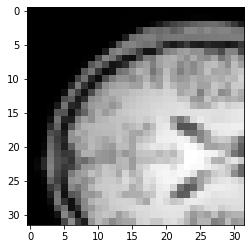

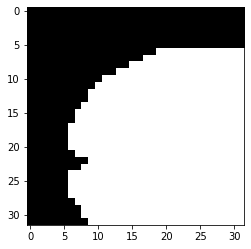

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D", "npy")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D", "npy"))

# INPUT
path = os.path.join(DATA_TEST_PATH, "2D", "npy", "input.npy")

tensor = crop_data(input, crop_type="2D")
save_as_npy(tensor, path=path)

plt.imshow(load_numpy(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D", "npy", "target.npy")

tensor = crop_data(target, crop_type="2D")
save_as_npy(tensor, path=path)

plt.imshow(load_numpy(path), cmap="gray")
plt.show()

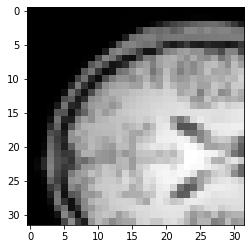

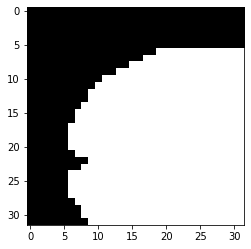

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D", "npz")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D", "npz"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "2D", "npz", "input.npz")

tensor = crop_data(input, crop_type="2D")
save_as_npz(tensor, path=path)

plt.imshow(load_zstd(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D", "npz", "target.npz")

tensor = crop_data(target, crop_type="2D")
save_as_npz(tensor, path=path)

plt.imshow(load_zstd(path), cmap="gray")
plt.show()

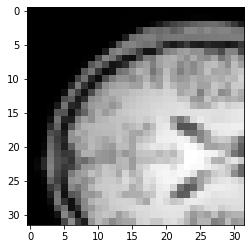

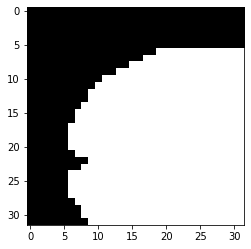

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D", "pt")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D", "pt"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "2D", "pt", "input.pt")

tensor = crop_data(input, crop_type="2D")
save_as_pt(tensor, path=path)

plt.imshow(load_tensor(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D", "pt", "target.pt")

tensor = crop_data(target, crop_type="2D")
save_as_pt(tensor, path=path)

plt.imshow(load_tensor(path), cmap="gray")
plt.show()

### 2D with modalities (RGB)

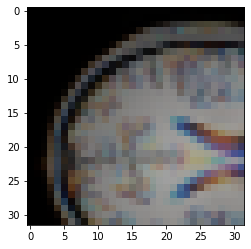

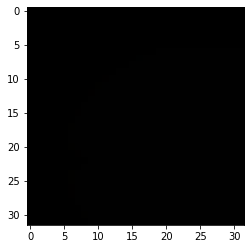

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D_modalities", "png")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D_modalities", "png"))

# INPUT
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "png", "input.png")

tensor = crop_data(input, crop_type="2D_modalities")
save_as_png(tensor, path=path)

plt.imshow(load_image(path))
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "png", "target.png")

tensor = crop_data(target, crop_type="2D_modalities")
save_as_png(tensor, path=path)

plt.imshow(load_image(path))
plt.show()

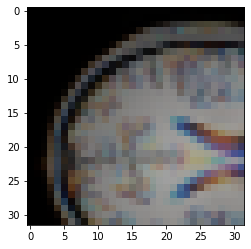

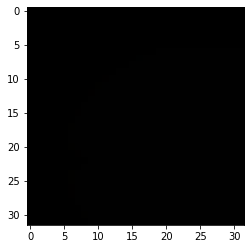

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D_modalities", "npy")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D_modalities", "npy"))

# INPUT
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "npy", "input.npy")

tensor = crop_data(input, crop_type="2D_modalities")
save_as_npy(tensor, path=path)

plt.imshow(load_numpy(path))
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "npy", "target.npy")

tensor = crop_data(target, crop_type="2D_modalities")
save_as_npy(tensor, path=path)

plt.imshow(load_numpy(path))
plt.show()

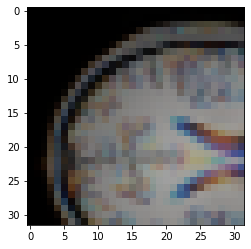

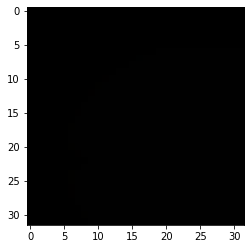

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D_modalities", "npz")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D_modalities", "npz"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "npz", "input.npz")

tensor = crop_data(input, crop_type="2D_modalities")
save_as_npz(tensor, path=path)

plt.imshow(load_zstd(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "npz", "target.npz")

tensor = crop_data(target, crop_type="2D_modalities")
save_as_npz(tensor, path=path)

plt.imshow(load_zstd(path), cmap="gray")
plt.show()

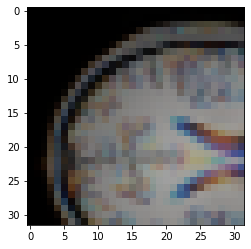

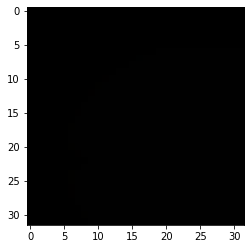

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "2D_modalities", "pt")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "2D_modalities", "pt"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "pt", "input.pt")

tensor = crop_data(input, crop_type="2D_modalities")
save_as_pt(tensor, path=path)

plt.imshow(load_tensor(path), cmap="gray")
plt.show()

# TARGET
path = os.path.join(DATA_TEST_PATH, "2D_modalities", "pt", "target.pt")

tensor = crop_data(target, crop_type="2D_modalities")
save_as_pt(tensor, path=path)

plt.imshow(load_tensor(path), cmap="gray")
plt.show()

### 3D

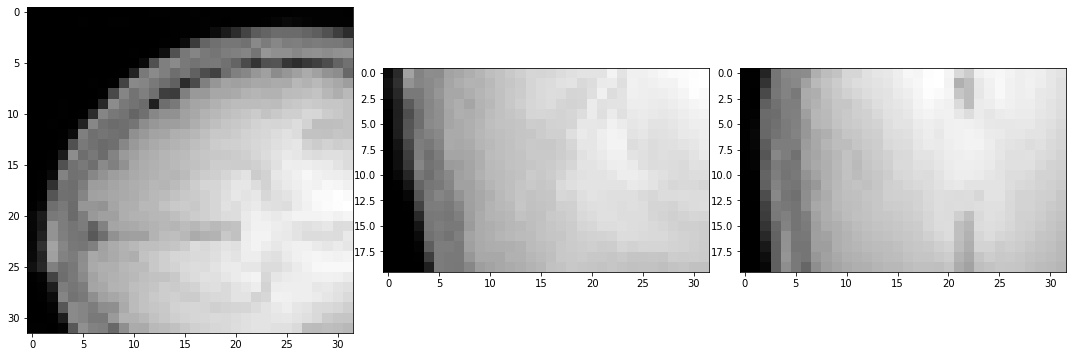

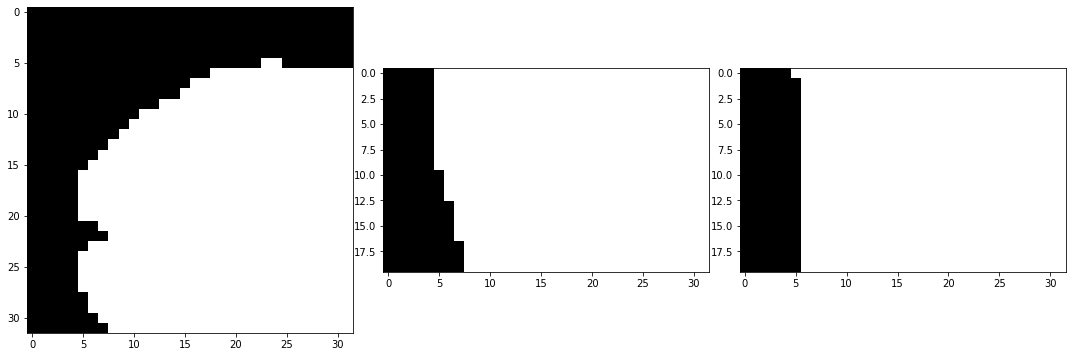

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "3D", "npy")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "3D", "npy"))

# INPUT
path = os.path.join(DATA_TEST_PATH, "3D", "npy", "input.npy")

tensor = crop_data(input, crop_type="3D")
save_as_npy(tensor, path=path)

plot_3D(load_numpy(path))

# TARGET
path = os.path.join(DATA_TEST_PATH, "3D", "npy", "target.npy")

tensor = crop_data(target, crop_type="3D")
save_as_npy(tensor, path=path)

plot_3D(load_numpy(path))

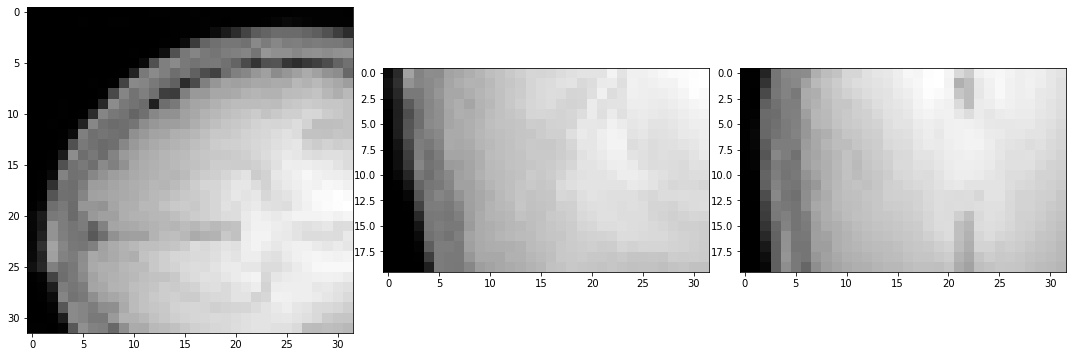

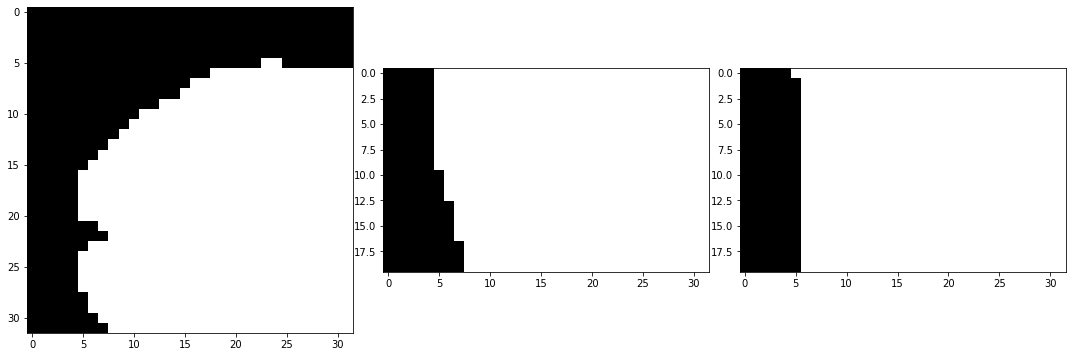

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "3D", "npz")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "3D", "npz"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "3D", "npz", "input.npz")

tensor = crop_data(input, crop_type="3D")
save_as_npz(tensor, path=path)

plot_3D(load_zstd(path))

# TARGET
path = os.path.join(DATA_TEST_PATH, "3D", "npz", "target.npz")

tensor = crop_data(target, crop_type="3D")
save_as_npz(tensor, path=path)

plot_3D(load_zstd(path))

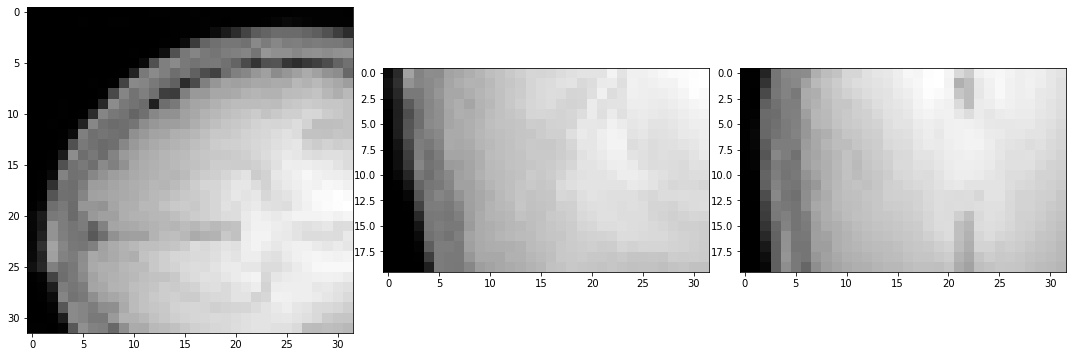

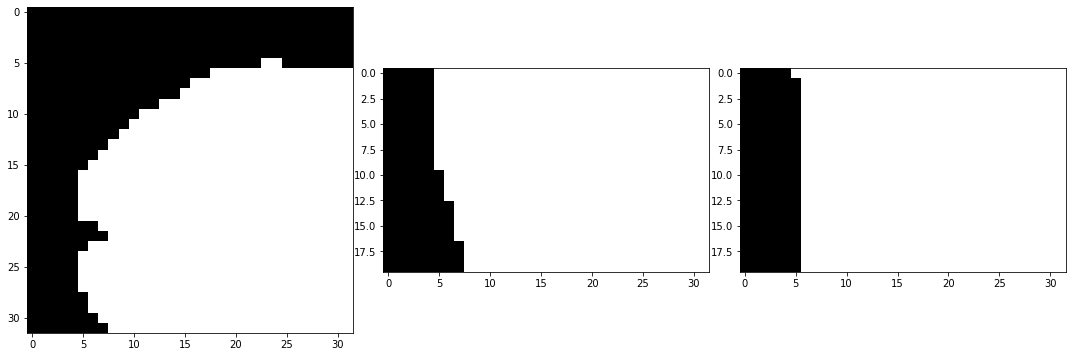

In [ ]:
if not os.path.exists(os.path.join(DATA_TEST_PATH, "3D", "pt")):
    os.makedirs(os.path.join(DATA_TEST_PATH, "3D", "pt"))
    
# INPUT
path = os.path.join(DATA_TEST_PATH, "3D", "pt", "input.pt")

tensor = crop_data(input, crop_type="3D")
save_as_pt(tensor, path=path)

plot_3D(load_tensor(path))

# TARGET
path = os.path.join(DATA_TEST_PATH, "3D", "pt", "target.pt")

tensor = crop_data(target, crop_type="3D")
save_as_pt(tensor, path=path)

plot_3D(load_tensor(path))

## DOWNLOAD TEST DATASET

In [ ]:
shutil.rmtree(os.path.join("data", "dataset_tmp"))

In [ ]:
!zip -r data.zip data

  adding: data/ (stored 0%)
  adding: data/2D_modalities/ (stored 0%)
  adding: data/2D_modalities/png/ (stored 0%)
  adding: data/2D_modalities/png/target.png (deflated 5%)
  adding: data/2D_modalities/png/input.png (stored 0%)
  adding: data/2D_modalities/npz/ (stored 0%)
  adding: data/2D_modalities/npz/target.npz (deflated 40%)
  adding: data/2D_modalities/npz/input.npz (deflated 29%)
  adding: data/2D_modalities/pt/ (stored 0%)
  adding: data/2D_modalities/pt/target.pt (deflated 99%)
  adding: data/2D_modalities/pt/input.pt (deflated 78%)
  adding: data/2D_modalities/npy/ (stored 0%)
  adding: data/2D_modalities/npy/target.npy (deflated 98%)
  adding: data/2D_modalities/npy/input.npy (deflated 72%)
  adding: data/3D/ (stored 0%)
  adding: data/3D/npz/ (stored 0%)
  adding: data/3D/npz/target.npz (deflated 42%)
  adding: data/3D/npz/input.npz (deflated 15%)
  adding: data/3D/pt/ (stored 0%)
  adding: data/3D/pt/target.pt (deflated 99%)
  adding: data/3D/pt/input.pt (deflated 78%)
 